**Data preparation, saving all comments in one variable.**

In [0]:
import pandas as pd
import numpy as np


In [2]:
data1= pd.read_excel("/content/Homedepot.xlsx")
data1
data2=data1.comb_review
m=0
a=""
for i in data2:
  
  a= a+" "+str(i) 
print(a)


 2 Star Review Rating provided by a verified purchasern Love it... Love itn 5 Star Review Rating provided by a verified purchasern 5 Star Review Rating provided by a verified purchasern 2 Star Review Rating provided by a verified purchasern leaked as soon as it was taken out of the box leaked as soon as it was taken out of the boxn The product leaked all over my kitchen floor The product leaked all over my kitchen floorn The unit leaks slow thru the hot side when turned... The unit leaks slow thru the hot side when turned on- Returned back-Will not purchase or recommend-n Does what it should. Works as it should. Dispenses water like I've never seen before.n Not a great product....many issues that seems ridiculous Motor is loud when pushing up water to reserve tank.Hot water is not available at all times. There is a button you push first, then must wait maybe 5 minutes. We use 5 Gallon Water Bottles. This machine only uses 3/4" of the water then will shut off. You have to put a new 5 ga

In [0]:
text=a.lower()

**Importing NLTK Libraries**

In [0]:

import nltk # for pre-processing text
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from textblob import TextBlob # for sentiment analysis

import string
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

**Tokenizing Sentences, THIS CAN BE SKIPPED**

In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
tokenized_text=sent_tokenize(text)

In [7]:
print(tokenized_text)

[' 2 star review rating provided by a verified purchasern love it... love itn 5 star review rating provided by a verified purchasern 5 star review rating provided by a verified purchasern 2 star review rating provided by a verified purchasern leaked as soon as it was taken out of the box leaked as soon as it was taken out of the boxn the product leaked all over my kitchen floor the product leaked all over my kitchen floorn the unit leaks slow thru the hot side when turned... the unit leaks slow thru the hot side when turned on- returned back-will not purchase or recommend-n does what it should.', 'works as it should.', "dispenses water like i've never seen before.n not a great product....many issues that seems ridiculous motor is loud when pushing up water to reserve tank.hot water is not available at all times.", 'there is a button you push first, then must wait maybe 5 minutes.', 'we use 5 gallon water bottles.', 'this machine only uses 3/4" of the water then will shut off.', 'you ha

**Word Tokenizer to break each words**

In [0]:
tokenized_word=word_tokenize(text)

In [10]:
print(tokenized_word)

['2', 'star', 'review', 'rating', 'provided', 'by', 'a', 'verified', 'purchasern', 'love', 'it', '...', 'love', 'itn', '5', 'star', 'review', 'rating', 'provided', 'by', 'a', 'verified', 'purchasern', '5', 'star', 'review', 'rating', 'provided', 'by', 'a', 'verified', 'purchasern', '2', 'star', 'review', 'rating', 'provided', 'by', 'a', 'verified', 'purchasern', 'leaked', 'as', 'soon', 'as', 'it', 'was', 'taken', 'out', 'of', 'the', 'box', 'leaked', 'as', 'soon', 'as', 'it', 'was', 'taken', 'out', 'of', 'the', 'boxn', 'the', 'product', 'leaked', 'all', 'over', 'my', 'kitchen', 'floor', 'the', 'product', 'leaked', 'all', 'over', 'my', 'kitchen', 'floorn', 'the', 'unit', 'leaks', 'slow', 'thru', 'the', 'hot', 'side', 'when', 'turned', '...', 'the', 'unit', 'leaks', 'slow', 'thru', 'the', 'hot', 'side', 'when', 'turned', 'on-', 'returned', 'back-will', 'not', 'purchase', 'or', 'recommend-n', 'does', 'what', 'it', 'should', '.', 'works', 'as', 'it', 'should', '.', 'dispenses', 'water', 'li

**Plooting Frequency of Words, plotting 30 high freq words**

In [11]:
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 5641 samples and 114147 outcomes>


In [12]:
fdist.most_common(20)

[('the', 5509),
 ('.', 5106),
 ('water', 3545),
 ('to', 3057),
 ('and', 2905),
 (',', 2717),
 ('it', 2635),
 ('a', 2514),
 ('is', 2248),
 ('i', 2138),
 ('this', 1376),
 ('for', 1302),
 ('hot', 1216),
 ('of', 1132),
 ('so', 1099),
 ('!', 1050),
 ('great', 961),
 ('cold', 932),
 ('in', 891),
 ('easy', 839)]

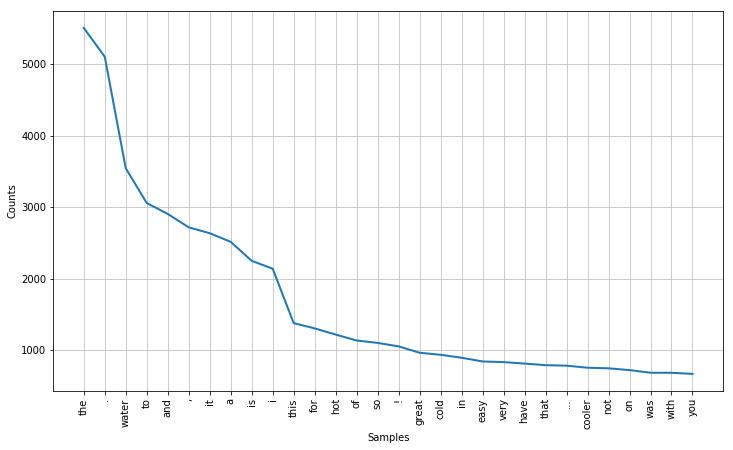

In [13]:
plt.figure(figsize=(12, 7))
fdist.plot(30,cumulative=False)
plt.show()

**Removing Stopwords**

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
stop_words=set(stopwords.words("english"))

In [0]:
filtered_word=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_word.append(w)

In [17]:
print("Filterd Words:",filtered_word[:100])

Filterd Words: ['2', 'star', 'review', 'rating', 'provided', 'verified', 'purchasern', 'love', '...', 'love', 'itn', '5', 'star', 'review', 'rating', 'provided', 'verified', 'purchasern', '5', 'star', 'review', 'rating', 'provided', 'verified', 'purchasern', '2', 'star', 'review', 'rating', 'provided', 'verified', 'purchasern', 'leaked', 'soon', 'taken', 'box', 'leaked', 'soon', 'taken', 'boxn', 'product', 'leaked', 'kitchen', 'floor', 'product', 'leaked', 'kitchen', 'floorn', 'unit', 'leaks', 'slow', 'thru', 'hot', 'side', 'turned', '...', 'unit', 'leaks', 'slow', 'thru', 'hot', 'side', 'turned', 'on-', 'returned', 'back-will', 'purchase', 'recommend-n', '.', 'works', '.', 'dispenses', 'water', 'like', "'ve", 'never', 'seen', 'before.n', 'great', 'product', '...', '.many', 'issues', 'seems', 'ridiculous', 'motor', 'loud', 'pushing', 'water', 'reserve', 'tank.hot', 'water', 'available', 'times', '.', 'button', 'push', 'first', ',', 'must']


In [0]:
fdist = FreqDist(filtered_word)

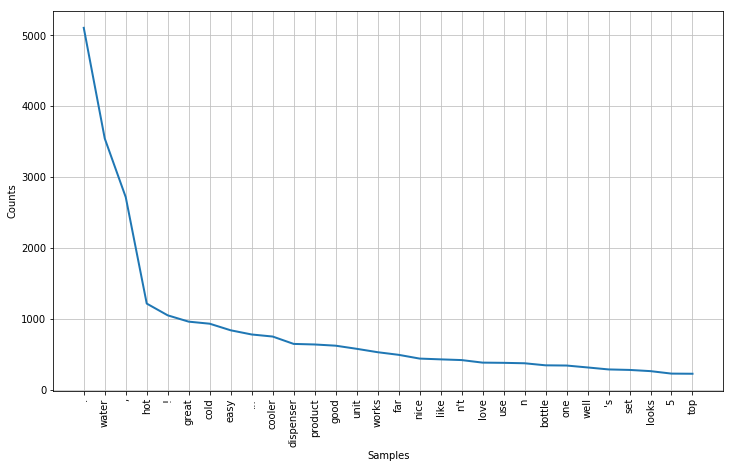

In [19]:
plt.figure(figsize=(12, 7))
fdist.plot(30,cumulative=False)
plt.show()

**Removing Punctuations**

In [0]:
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in filtered_word]

**Removing Non-Alphabetic Tokens**

In [0]:
filtered_words = [word for word in stripped if word.isalpha()]

**Plotting Filtered Words**

In [0]:
fdist = FreqDist(filtered_words)


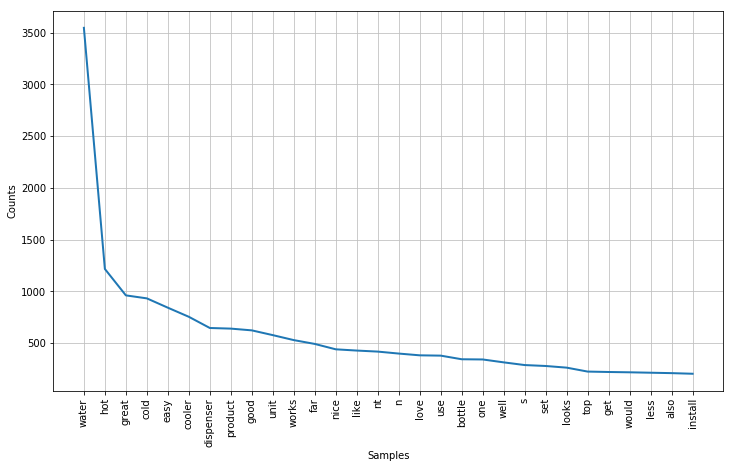

In [23]:
plt.figure(figsize=(12, 7))
fdist.plot(30,cumulative=False)
plt.show()

**Lexicon Normalization, Stemming and Lemmatization**

In [0]:
ps = PorterStemmer()

stemmed_words=[]
for w in filtered_words:
    stemmed_words.append(ps.stem(w))

In [25]:
print("Stemmed Words:",stemmed_words[:100])

Stemmed Words: ['star', 'review', 'rate', 'provid', 'verifi', 'purchasern', 'love', 'love', 'itn', 'star', 'review', 'rate', 'provid', 'verifi', 'purchasern', 'star', 'review', 'rate', 'provid', 'verifi', 'purchasern', 'star', 'review', 'rate', 'provid', 'verifi', 'purchasern', 'leak', 'soon', 'taken', 'box', 'leak', 'soon', 'taken', 'boxn', 'product', 'leak', 'kitchen', 'floor', 'product', 'leak', 'kitchen', 'floorn', 'unit', 'leak', 'slow', 'thru', 'hot', 'side', 'turn', 'unit', 'leak', 'slow', 'thru', 'hot', 'side', 'turn', 'on', 'return', 'backwil', 'purchas', 'recommendn', 'work', 'dispens', 'water', 'like', 've', 'never', 'seen', 'beforen', 'great', 'product', 'mani', 'issu', 'seem', 'ridicul', 'motor', 'loud', 'push', 'water', 'reserv', 'tankhot', 'water', 'avail', 'time', 'button', 'push', 'first', 'must', 'wait', 'mayb', 'minut', 'use', 'gallon', 'water', 'bottl', 'machin', 'use', 'water', 'shut']


**Trying Lemmatization**

In [26]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
lem = WordNetLemmatizer()

lemma_words=[]
for w in filtered_words:
    lemma_words.append(lem.lemmatize(w))

In [28]:
print("Lemmatize Words:",lemma_words[:100])

Lemmatize Words: ['star', 'review', 'rating', 'provided', 'verified', 'purchasern', 'love', 'love', 'itn', 'star', 'review', 'rating', 'provided', 'verified', 'purchasern', 'star', 'review', 'rating', 'provided', 'verified', 'purchasern', 'star', 'review', 'rating', 'provided', 'verified', 'purchasern', 'leaked', 'soon', 'taken', 'box', 'leaked', 'soon', 'taken', 'boxn', 'product', 'leaked', 'kitchen', 'floor', 'product', 'leaked', 'kitchen', 'floorn', 'unit', 'leak', 'slow', 'thru', 'hot', 'side', 'turned', 'unit', 'leak', 'slow', 'thru', 'hot', 'side', 'turned', 'on', 'returned', 'backwill', 'purchase', 'recommendn', 'work', 'dispenses', 'water', 'like', 've', 'never', 'seen', 'beforen', 'great', 'product', 'many', 'issue', 'seems', 'ridiculous', 'motor', 'loud', 'pushing', 'water', 'reserve', 'tankhot', 'water', 'available', 'time', 'button', 'push', 'first', 'must', 'wait', 'maybe', 'minute', 'use', 'gallon', 'water', 'bottle', 'machine', 'us', 'water', 'shut']


**Word Count**

In [29]:
print('Total number of words after text pre-processing :', len(lemma_words))

Total number of words after text pre-processing : 55325


**Word Cloud**

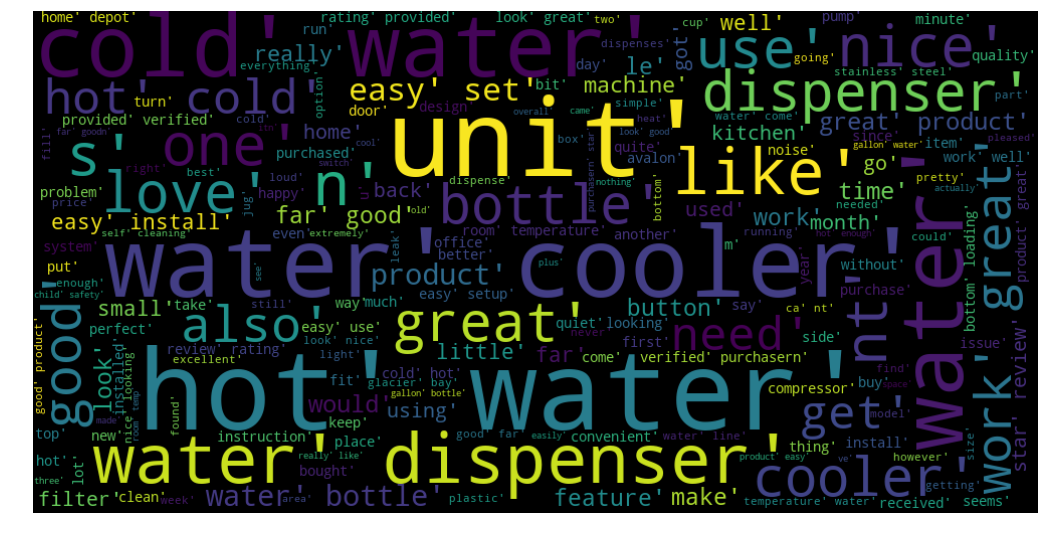

In [30]:
filtered_speech_words = str(lemma_words)

wordcloud = WordCloud(width=1000, height=500,
                      random_state=21, max_font_size=110).generate(filtered_speech_words)
plt.figure(figsize=(18, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**Getting only Unique Words**

In [0]:
speech_word_counts = Counter(lemma_words)

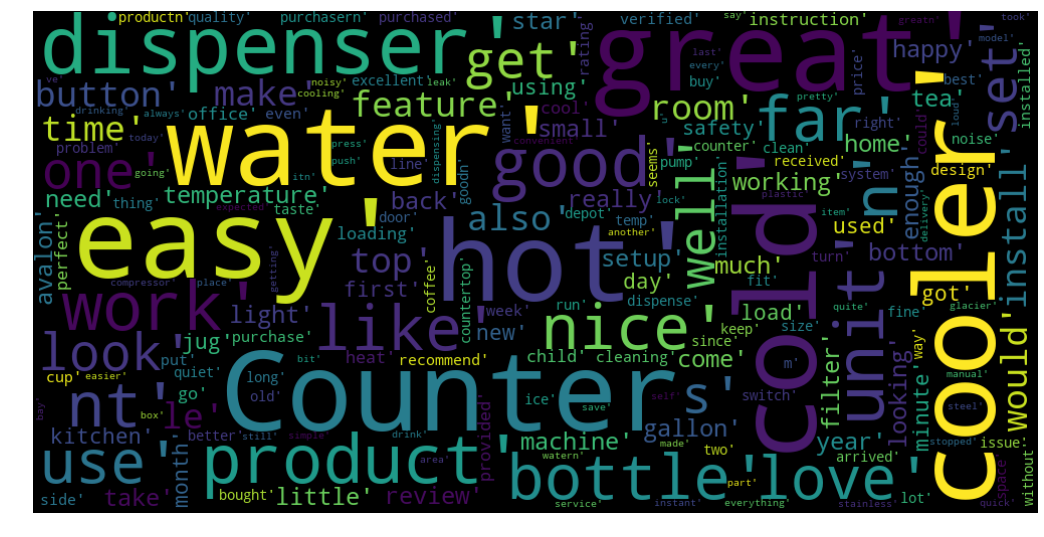

In [32]:
filtered_speech_words = str(speech_word_counts)

wordcloud = WordCloud(width=1000, height=500,
                      random_state=21, max_font_size=110).generate(filtered_speech_words)
plt.figure(figsize=(18, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**Plotting 20 most top words**

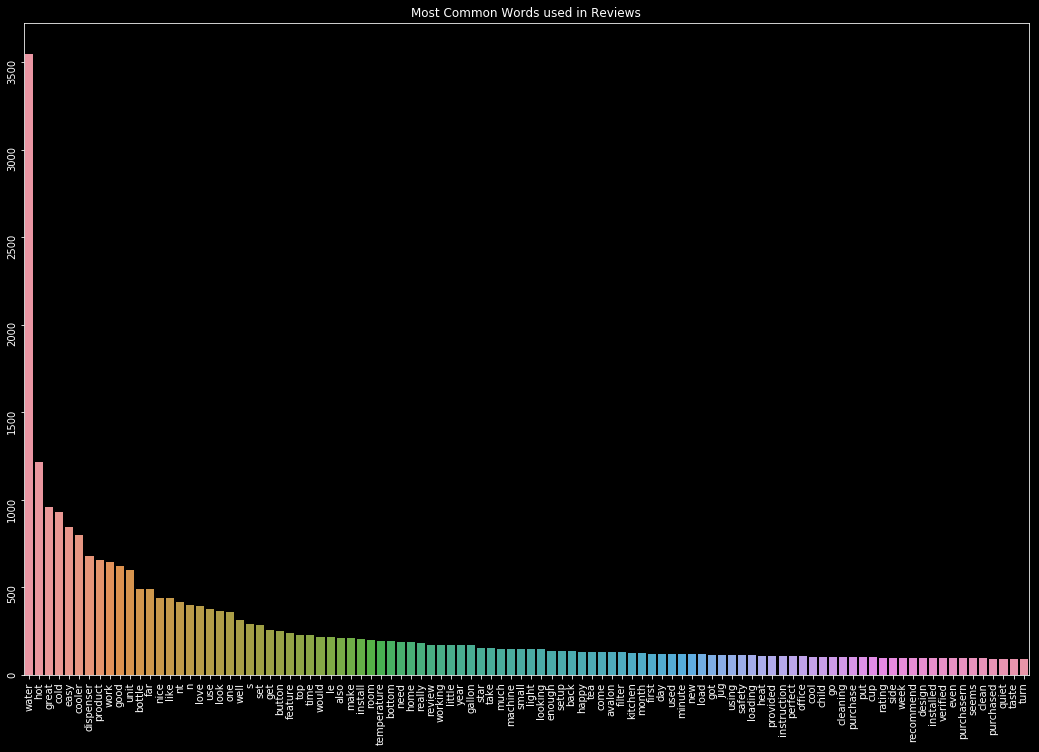

In [33]:
rr_common_words = [word[0] for word in speech_word_counts.most_common(100)]
rr_common_counts = [word[1] for word in speech_word_counts.most_common(100)]

# Using background style
plt.style.use('dark_background')
plt.figure(figsize=(18, 12))

sns.barplot(x=rr_common_words, y=rr_common_counts)
plt.title('Most Common Words used in Reviews')
plt.tick_params(axis ='x', rotation = 90)
plt.tick_params(axis ='y', rotation = 90)
plt.show()

In [0]:
df=pd.DataFrame(speech_word_counts.most_common(100))

In [0]:
df.to_excel('homedepot_common_100.xlsx')

**Sentiments Using TextBlob**

In [0]:
speech_text_object = TextBlob(filtered_speech_words)

In [36]:
speech_text_object.sentiment

Sentiment(polarity=0.22546935608583343, subjectivity=0.7089458530736945)

**Plotting words by their sentiments.**

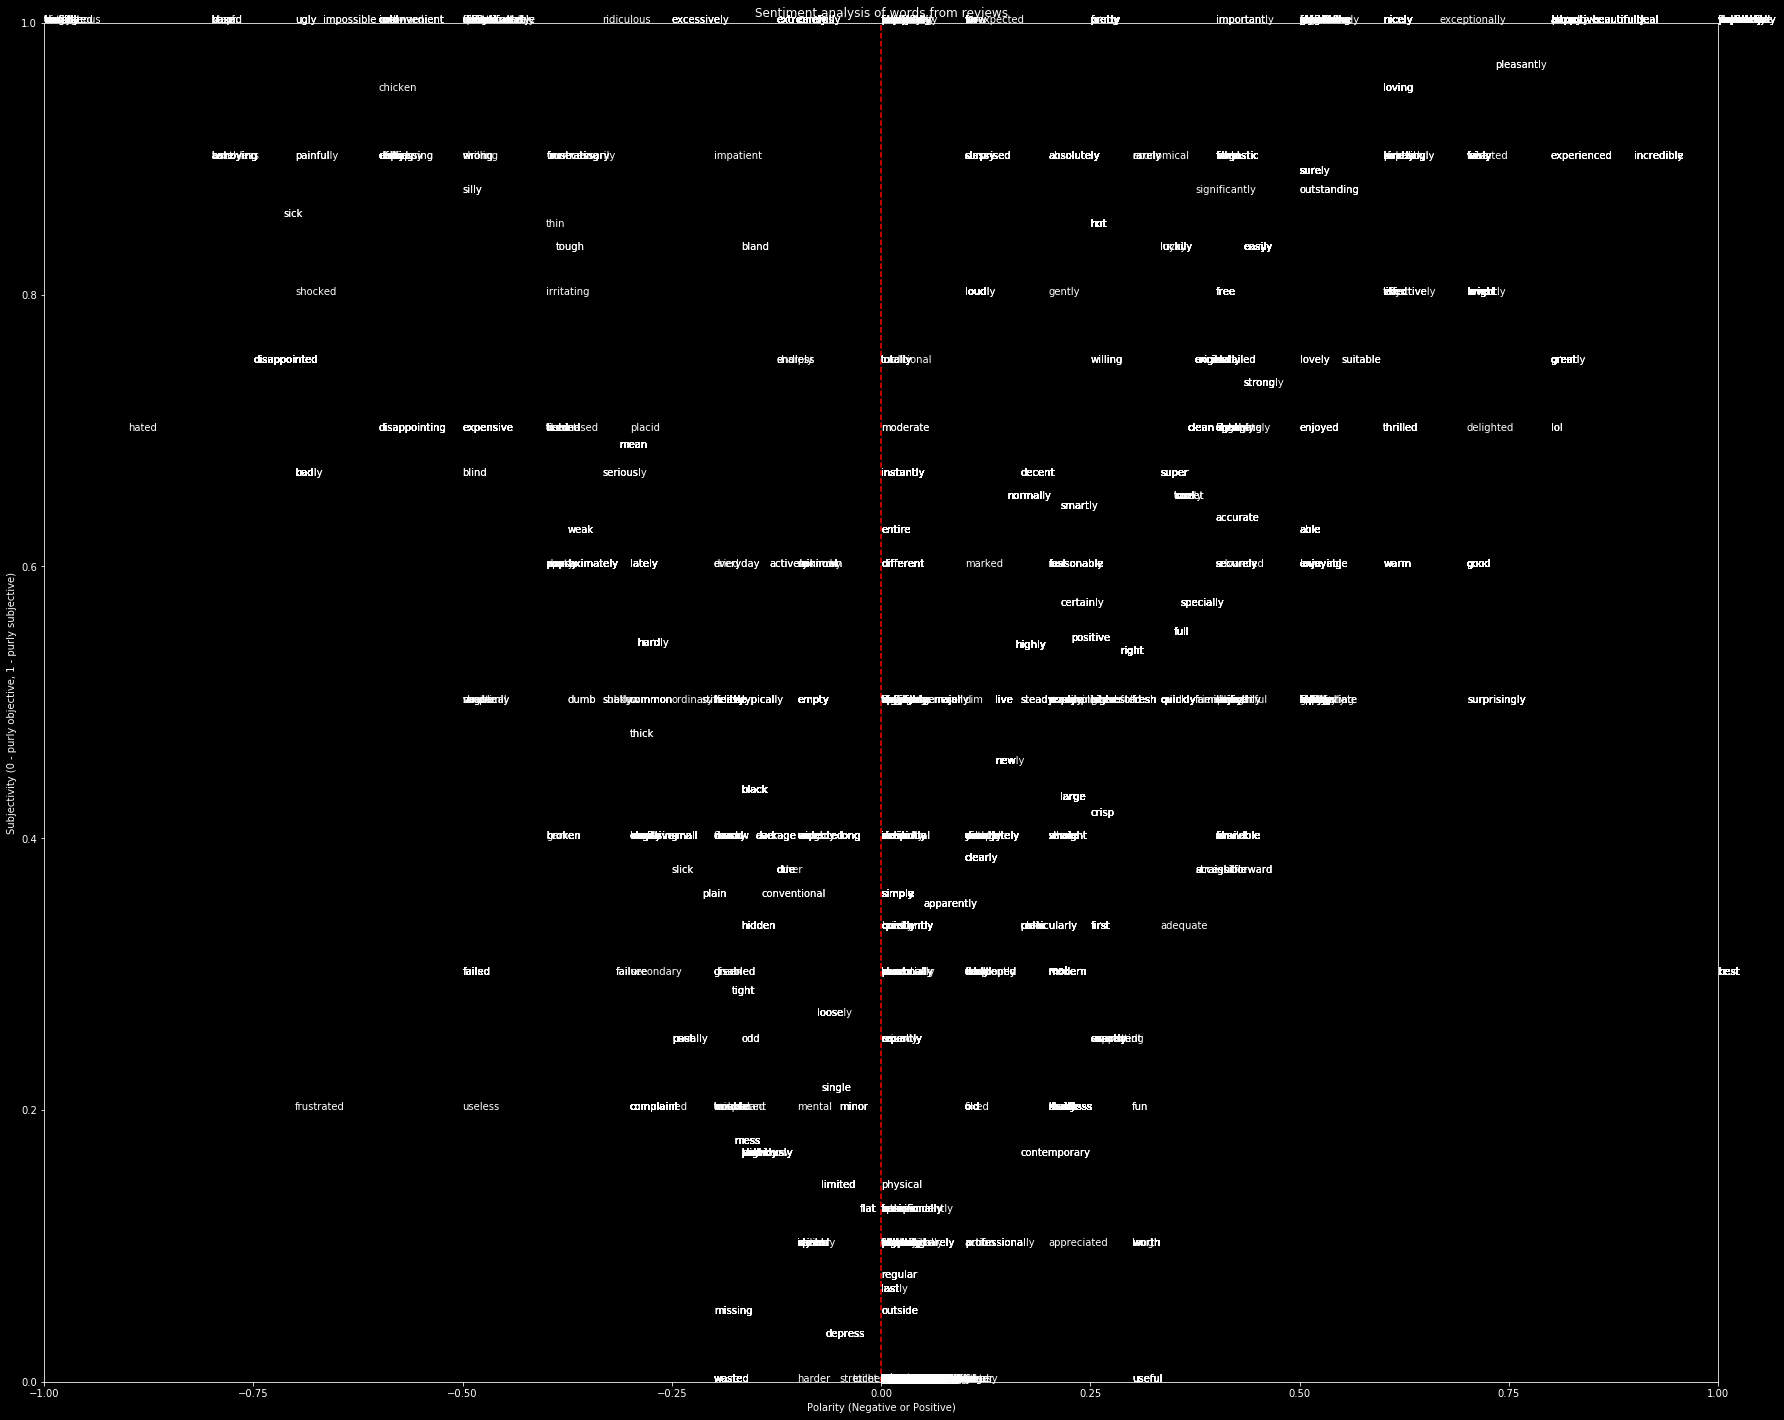

In [38]:
plt.figure(figsize=(30,25))

# for each word draw the text on the char using the sentiment score as the x and y coordinates
for word in lemma_words:
    word_sentiment = TextBlob(word).sentiment
    plt.text(word_sentiment.polarity, # x coordinate
             word_sentiment.subjectivity, # y coordinate
             word) # the text to draw

# set axis ranges 
plt.xlim(-1, 1)
plt.ylim(0, 1)

# draw line in middle
plt.axvline(0, color='red', linestyle='dashed')

# label axis
plt.title('Sentiment analysis of words from reviews')
plt.xlabel('Polarity (Negative or Positive)')
plt.ylabel('Subjectivity (0 - purly objective, 1 - purly subjective)')

# display
plt.show()

**Plotting Bigrams**

In [0]:
from nltk.util import ngrams

In [40]:
print(text)

 2 star review rating provided by a verified purchasern love it... love itn 5 star review rating provided by a verified purchasern 5 star review rating provided by a verified purchasern 2 star review rating provided by a verified purchasern leaked as soon as it was taken out of the box leaked as soon as it was taken out of the boxn the product leaked all over my kitchen floor the product leaked all over my kitchen floorn the unit leaks slow thru the hot side when turned... the unit leaks slow thru the hot side when turned on- returned back-will not purchase or recommend-n does what it should. works as it should. dispenses water like i've never seen before.n not a great product....many issues that seems ridiculous motor is loud when pushing up water to reserve tank.hot water is not available at all times. there is a button you push first, then must wait maybe 5 minutes. we use 5 gallon water bottles. this machine only uses 3/4" of the water then will shut off. you have to put a new 5 ga

In [0]:
import itertools

In [0]:
def ngrams_wrapper(sent):
    return list(nltk.ngrams(sent, 2))

In [0]:
sentences = nltk.sent_tokenize(text)

In [0]:
tokenized = map(nltk.tokenize.word_tokenize, sentences)

In [0]:
bigrams = map(ngrams_wrapper, tokenized)

In [0]:
print(bigrams)

In [0]:
bigram = list(itertools.chain.from_iterable(bigrams))

In [0]:
freq_dist = nltk.FreqDist(bigram)

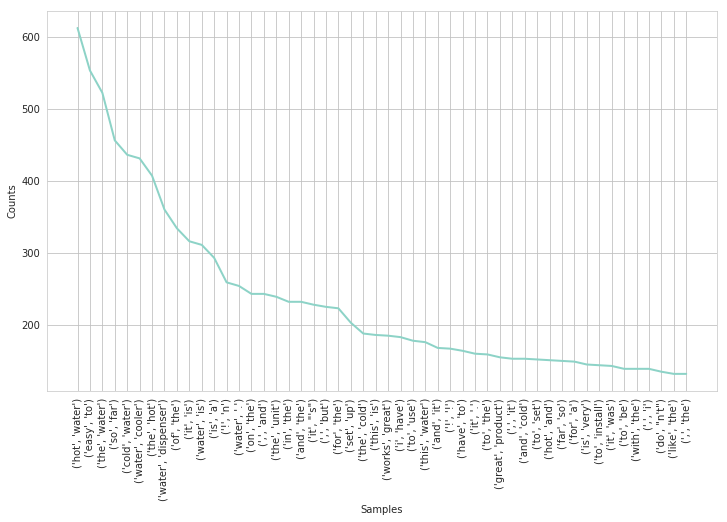

In [48]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 7))
freq_dist.plot(50,cumulative=False)
plt.show()

In [0]:
bigrams_7 = map(ngrams_wrapper_2, tokenized)

In [0]:
bigram_7 = list(itertools.chain.from_iterable(bigrams_7))

In [0]:
freq_dist_7 = nltk.FreqDist(bigram_7)

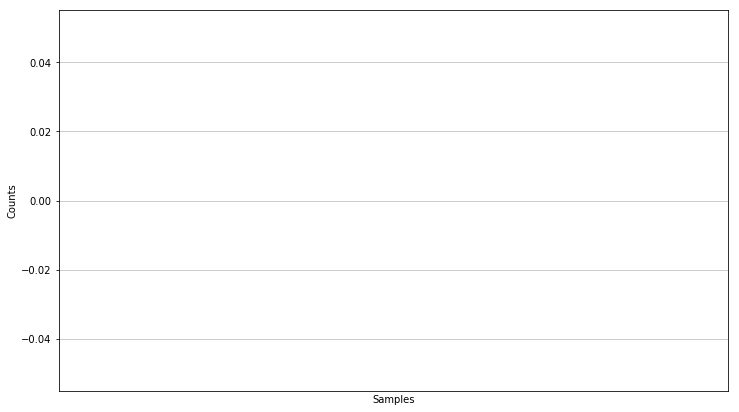

In [0]:
plt.figure(figsize=(12, 7))
freq_dist_7.plot(50,cumulative=False)
plt.show()

In [0]:
prob_dist = nltk.MLEProbDist(freq_dist)

**Bigrams on Lemma Words**

In [0]:
bigrams_2 = map(ngrams_wrapper, lemma_words)

In [0]:
print(lemma_words)

['Everybody', 'come', 'house', 'comment', 'refreshingly', 'cool', 'water', 'cooler', 'Very', 'nice', 'looking', 'Also', 'quiet', 'It', 'worked', 'fine', 'first', 'day', 'stopped', 'working', 'next', 'After', 'checking', 'filling', 'water', 'ect', 'still', 'could', 'get', 'work', 'right', 'sometimes', 'got', 'water', 'others', 'time', 'would', 'We', 'return', 'Since', 'gift', 'ended', 'replaceing', 'one', 'store', 'near', 'The', 'unit', 'work', 'well', 'I', 'read', 'hot', 'cold', 'unit', 'leaked', 'want', 'one', 'Hard', 'find', 'type', 'unit', 'Cold', 'It', 'work', 'well', 'better', 'last', 'attachment', 'add', 'bottle', 'turned', 'upside', 'This', 'easy', 'clean', 'attachment', 'The', 'price', 'however', 'double', 'I', 'paid', 'last', 'one', 'Costco', 'Hard', 'find', 'cold', 'unit', 'I', 'hesitation', 'recommending', 'afford', 'Works', 'Great', 'Works', 'without', 'power', 'Works', 'like', 'charm', 'easy', 'set', 'use', 'took', 'camp', 'work', 'well', 'Great', 'Juice', 'way', 'get', 'w

In [0]:
bigram_2 = list(itertools.chain.from_iterable(bigrams_2))

In [0]:
freq_dist_2 = nltk.FreqDist(bigram_2)

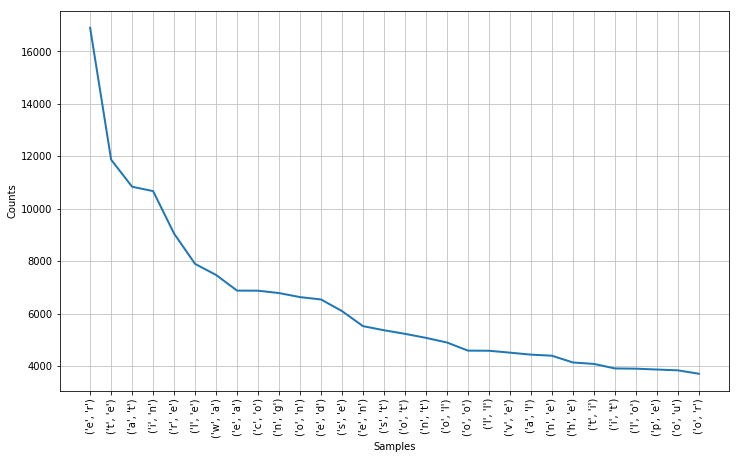

In [0]:
plt.figure(figsize=(12, 7))
freq_dist_2.plot(30,cumulative=False)
plt.show()

**Bigrams on Stemmed words**

In [0]:
def ngrams_wrapper_2(sent):
    return list(nltk.ngrams(sent, 5))

In [0]:
bigrams_3 = map(ngrams_wrapper_2, stemmed_words)

In [0]:
bigram_3 = list(itertools.chain.from_iterable(bigrams_3))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: generator 'ngrams' raised StopIteration
  


In [0]:
freq_dist_3 = nltk.FreqDist(bigram_3)

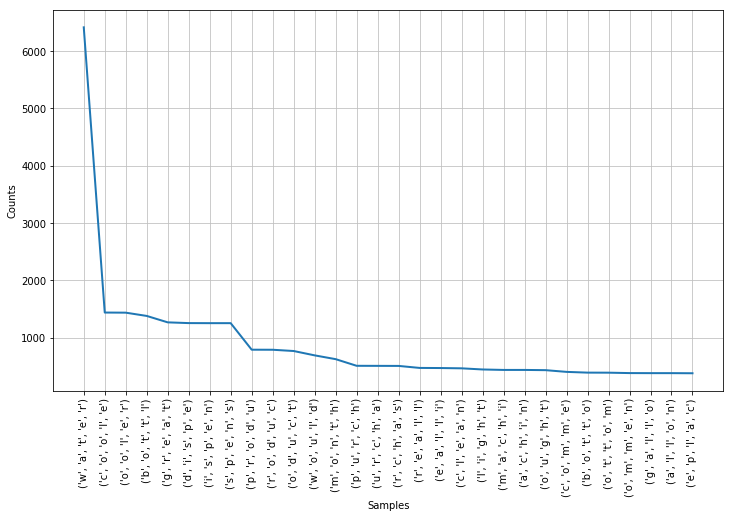

In [0]:
plt.figure(figsize=(12, 7))
freq_dist_3.plot(30,cumulative=False)
plt.show()

In [0]:
https://towardsdatascience.com/sentiment-analysis-with-python-part-2-4f71e7bde59a
https://towardsdatascience.com/sentiment-analysis-with-python-part-1-5ce197074184

**Bigram on Filtered words, removing punctuation**

In [0]:
filtered_words

In [0]:
bigrams_100 = map(ngrams_wrapper, filtered_words)

In [0]:
bigram_100 = list(itertools.chain.from_iterable(bigrams_100))

In [0]:
freq_dist_100 = nltk.FreqDist(bigram_100)

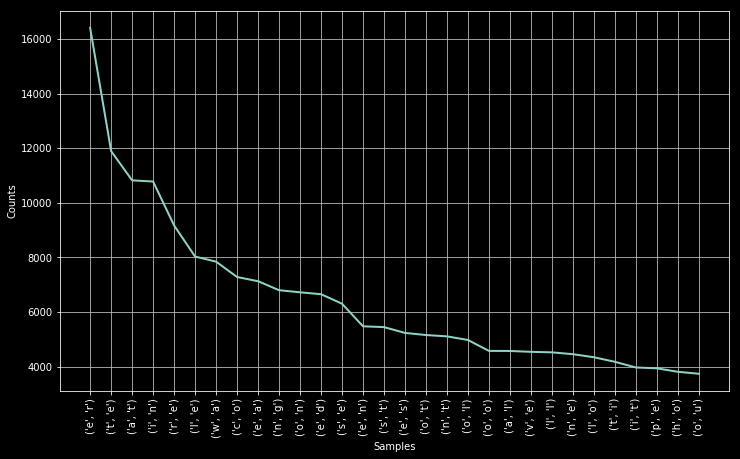

In [0]:
plt.figure(figsize=(12, 7))
freq_dist_100.plot(30,cumulative=False)
plt.show()

**Polarity for each comment**

In [0]:
data5=data1.comb_review

In [0]:
list5=[]
a=""
for w in data5:
  a=str(w).lower()
  list5.append(a)




In [51]:
print(list5[0])

2 star review rating provided by a verified purchasern


In [52]:
len(list5)

2165

In [53]:
data1.shape

(2165, 33)

In [54]:
senti=[]
for i in list5:
  speech_text_object_2 = TextBlob(str(i))
  senti.append(speech_text_object_2.sentiment.polarity)
print(senti)
  

[0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, -0.025000000000000022, 0.0, -0.02100815850815852, 0.5333333333333333, 0.32999999999999996, 0.19246031746031744, 0.14444444444444446, 0.14029106858054227, 0.22857142857142856, 0.3444444444444444, 0.5222222222222223, 0.24055555555555558, 0.16813725490196083, 0.075, 0.06845238095238096, 0.5908333333333334, 0.42109375, 0.39999999999999997, 0.01160714285714286, 0.21166666666666667, 0.6444444444444445, 0.1420138888888889, 0.559047619047619, 0.32842261904761905, 0.06080278228715729, 0.1728409090909091, 0.16269841269841273, 0.3260416666666667, 0.255, 0.2595535714285714, 0.16923076923076924, 0.3816666666666667, 0.3185185185185185, 0.3, 0.45545454545454545, 1.0, 0.0, 0.5270833333333333, 0.43333333333333335, 0.7000000000000001, 0.0, -0.04999999999999999, 0.2555555555555556, 0.68125, 0.36818181818181817, 0.49, 0.0, 0.8, 0.1, 0.014583333333333351, 0.5, 0.5612554112554113, 0.8, 1.0, 0.6, -0.2916666666666667, 0.16666666666666663, 0.375, 0.5633333333333334, 0.338095

In [55]:
len(senti)

2165

In [0]:
bond=data1

In [0]:
bond.head(2)

ugam_id  ...                comb_review
0       25  ...       One Star The arrives
1       26  ...  Five Stars Awesome item !

[2 rows x 33 columns]

In [0]:
bond["Polarity"]=senti

In [58]:
bond.tail(2)

ugam_id  ...  Polarity
2163       19  ...  0.800000
2164       19  ...  0.221368

[2 rows x 34 columns]

In [0]:
bond.to_excel('varad_1.xlsx')

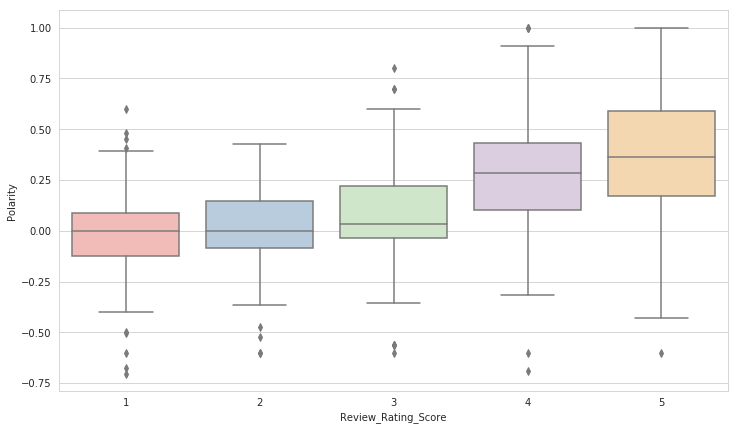

In [59]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 7))
sns.boxplot(x='Review_Rating_Score',y='Polarity',data=bond,palette='Pastel1',color='white')

In [0]:
bond.shape

(4157, 33)

In [60]:
sub=[]
for i in list5:
  speech_text_object_3 = TextBlob(str(i))
  sub.append(speech_text_object_3.sentiment.subjectivity)
print(sub)
  

[0.0, 0.6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.625, 0.0, 0.5205710955710955, 0.6190476190476191, 0.77, 0.49107709750566897, 0.5777777777777778, 0.48532695374800633, 0.7935714285714286, 0.7777777777777778, 0.7555555555555556, 0.5955555555555556, 0.572875816993464, 0.3055555555555555, 0.4880952380952381, 0.675, 0.39166666666666666, 0.8, 0.65, 0.49833333333333335, 0.7277777777777779, 0.5944444444444444, 0.7642857142857142, 0.6763392857142857, 0.6160150613275613, 0.420719696969697, 0.5797528860028858, 0.5520833333333334, 0.8833333333333334, 0.5630527210884354, 0.6410256410256411, 0.65, 0.5166666666666667, 0.8666666666666667, 0.6936363636363636, 1.0, 0.0, 0.7583333333333333, 0.8333333333333334, 1.0, 0.0, 0.7000000000000001, 0.7555555555555555, 0.875, 0.7272727272727273, 0.65, 0.5, 0.75, 1.0, 0.43125, 0.8, 0.6982683982683984, 1.0, 1.0, 1.0, 0.5416666666666666, 0.7296296296296296, 0.6875, 1.0, 0.6380952380952382, 0.5694444444444445, 0.0, 0.8666666666666667, 0.3, 0.36875, 0.8666666666666667, 0.925, 0.7

In [0]:
bond["Subjectivity"]=sub

In [0]:
bond.head(5)

ugam_id  ... Subjectivity
0       25  ...     0.000000
1       26  ...     1.000000
2       28  ...     0.696429
3       25  ...     0.491071
4       25  ...     0.681034

[5 rows x 35 columns]

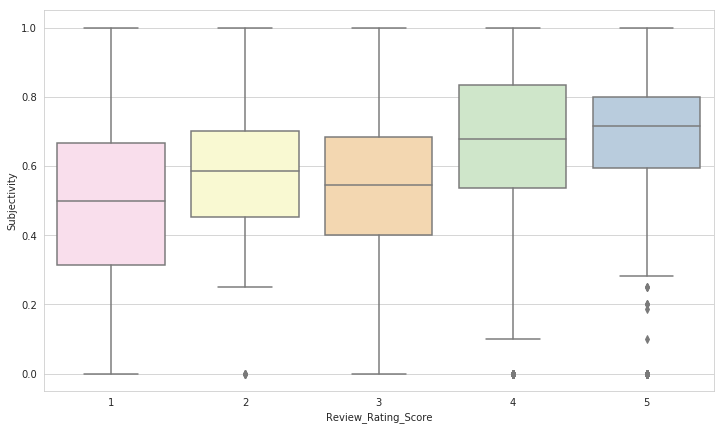

In [62]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 7))
sns.boxplot(x='Review_Rating_Score',y='Subjectivity',data=bond,palette='Pastel1_r',color='white')

**Polarity of Unique Words, use this**

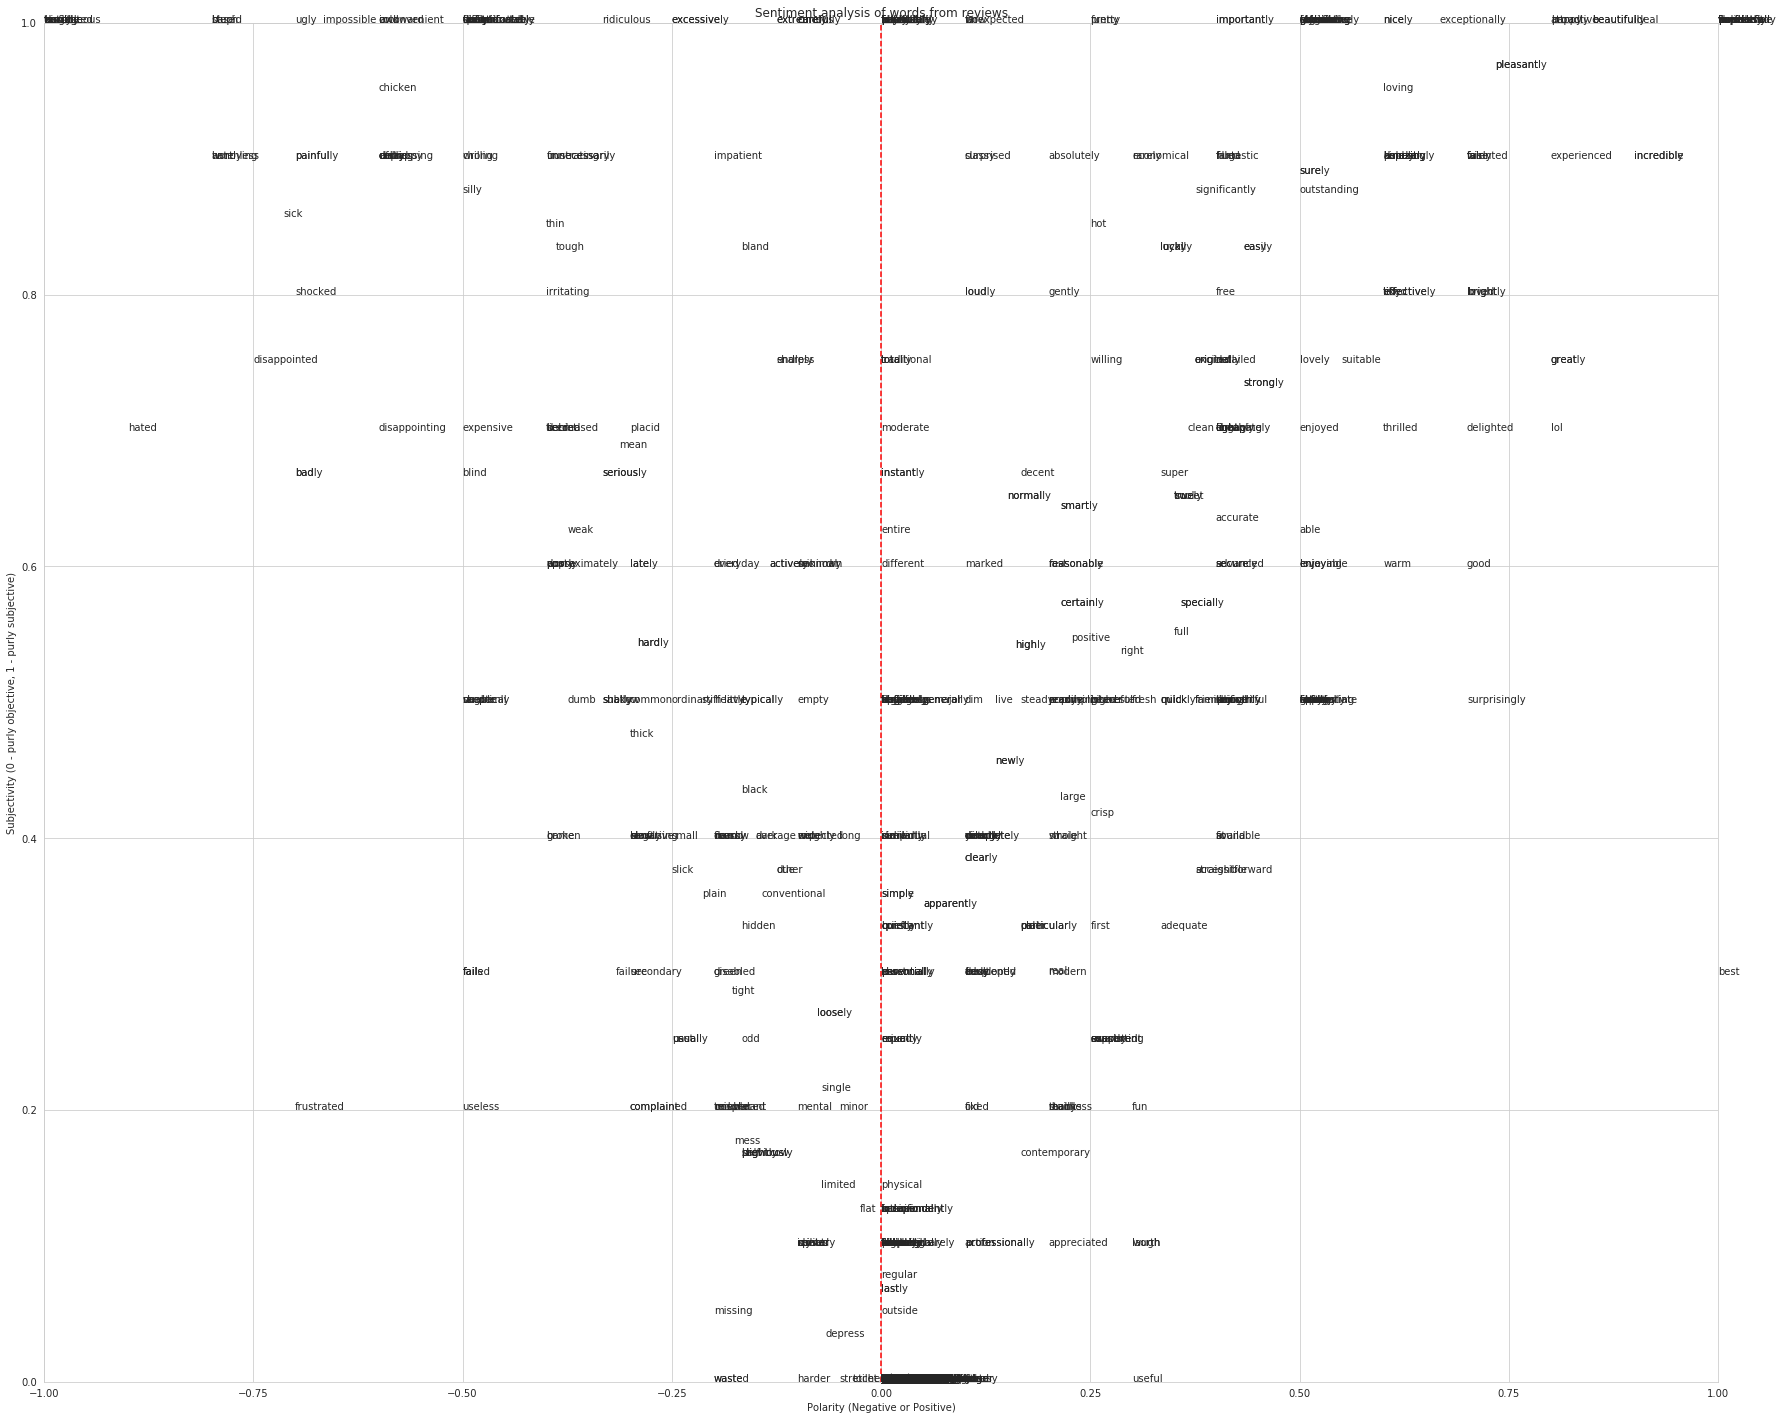

In [63]:
plt.figure(figsize=(30,25))

# for each word draw the text on the char using the sentiment score as the x and y coordinates
for word in speech_word_counts:
    word_sentiment = TextBlob(word).sentiment
    plt.text(word_sentiment.polarity, # x coordinate
             word_sentiment.subjectivity, # y coordinate
             word) # the text to draw

# set axis ranges 
plt.xlim(-1, 1)
plt.ylim(0, 1)

# draw line in middle
plt.axvline(0, color='red', linestyle='dashed')

# label axis
plt.title('Sentiment analysis of words from reviews')
plt.xlabel('Polarity (Negative or Positive)')
plt.ylabel('Subjectivity (0 - purly objective, 1 - purly subjective)')

# display
plt.show()

In [0]:
bond.to_excel('combined_pol_sub.xlsx')

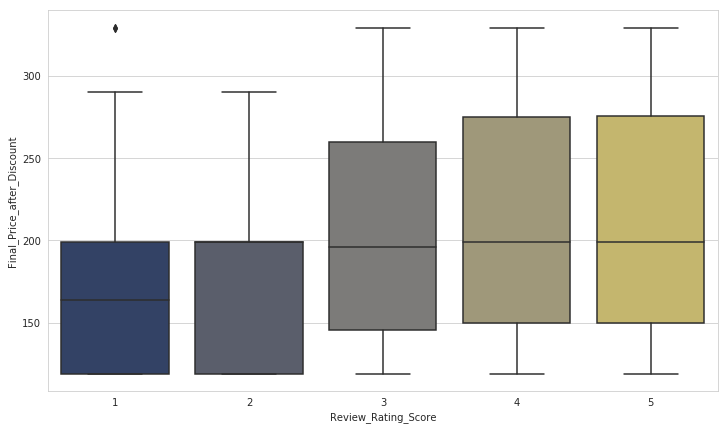

In [64]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Review_Rating_Score',y='Final_Price_after_Discount',data=bond,palette='cividis',color='white')

**Trying NER, not possible due to large number of Characters**

In [0]:
import spacy

In [0]:
nlp = spacy.load('en_core_web_sm')

In [0]:
doc = nlp(text)

In [0]:
for ent in doc.ents: 
    print(ent.text, ent.start_char, ent.end_char, ent.label_) 

Text(0.5, 1.0, 'Ratings on Homedepot')

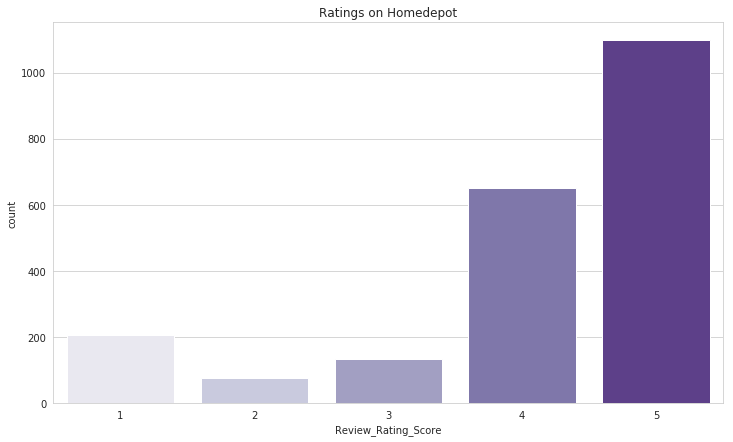

In [70]:
plt.figure(figsize=(12, 7))
sns.countplot(x='Review_Rating_Score',data=bond, palette='Purples')
plt.title('Ratings on Homedepot')

In [0]:
bond.to_excel('homedepot_pol_sub.xlsx')